# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, I am investigating a TMDb movies database file which has collection of important detials of about 10k+ movies, including their details of budget, revenue, release dates, etc. 


### Question(s) for Analysis
> Q1: Are movies with high popularity tend to have a bigger budget and better revenue ? (is there a correlation between popularity & budget & revenue ?)

> Q2: Do movies become longer as the years go by ? (is there a correlation between relase year and runtime?)

In [39]:
# set up 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

<a id='wrangling'></a>
## Data Wrangling

In [40]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'Database_TMDb_movie_data', 'tmdb-movies.csv')
df = pd.read_csv(file_path)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [41]:
#let's find out how many columns and row we have
df.shape

(10866, 21)

In [42]:
#let's have over all look at the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### My finding
> 1- [homepage, director, tagline, keywords, overview, genres, production_companies, director, cast] all have some missing values but most of them like homepage column are not actually helpful to our analysis so we should consider deleting some of them during the cleaning.

> 2- [release_date] is string type should be datetime type so let's work on that during the cleaning



### Data Cleaning

In [43]:
#let's drop some of the columns we talk about [based on the questions we are trying to find out all of them they are not useful except genres]
df.drop(['homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies','director', 'cast'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [44]:
#convert the release_date to datetime obj 
df['release_date']= pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   imdb_id         10856 non-null  object        
 2   popularity      10866 non-null  float64       
 3   budget          10866 non-null  int64         
 4   revenue         10866 non-null  int64         
 5   original_title  10866 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  release_year    10866 non-null  int64         
 12  budget_adj      10866 non-null  float64       
 13  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


> nice ! we were able to have dataframe that is more focus to solve our questions and less memory usage :)

<a id='eda'></a>
## Exploratory Data Analysis



### Are movies with high popularity tend to have a bigger budget and better revenue ? (is there a relationship between popularity & budget & revenue ?)

#### please note:
- hpm: high popular movies.
- nhpm: not a high popular movies.
- hbm: high budget movies.
- nhbm: not a high budget movies.
- bm: budget mean
- rm: revenue mean

In [45]:
# to decide what to consider a high popularity we should get the mean of the popularity attribute and then any movie 
# that have popularity that is above the mean consider is high popular movie
popularity_mean = df['popularity'].mean()
popularity_mean

0.6464409519602429

In [46]:
df_hpm = df[df['popularity'] > popularity_mean]
df_hpm.shape

(3061, 14)

In [47]:
df_hpm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3061.000000,3061.000000,3.061000e+03,3.061000e+03,3061.000000,3061.000000,3061.000000,3061.000000,3.061000e+03,3.061000e+03
mean,55897.791245,1.547061,3.792057e+07,1.218346e+08,107.802025,648.757922,6.251715,2003.027442,4.357840e+07,1.514259e+08
std,86041.363936,1.534109,4.587339e+07,1.932661e+08,23.854159,939.698065,0.798087,11.198531,4.873867e+07,2.356909e+08
min,5.000000,0.646441,0.000000e+00,0.000000e+00,0.000000,10.000000,3.300000,1960.000000,0.000000e+00,0.000000e+00
25%,4638.000000,0.820611,4.500000e+06,6.629178e+06,95.000000,144.000000,5.700000,1997.000000,6.061307e+06,7.576805e+06
50%,11412.000000,1.090465,2.300000e+07,5.511236e+07,105.000000,311.000000,6.300000,2006.000000,2.835803e+07,6.956391e+07
75%,67913.000000,1.682492,5.300000e+07,1.529447e+08,119.000000,722.000000,6.800000,2012.000000,6.394997e+07,1.890207e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


In [48]:
# comparing the average budget spent on high popular movies VS the average budget spent on movies 
# with average to low popularity will give us the answer
df_nhpm = df[df['popularity'] <= popularity_mean]
df_nhpm.shape

(7805, 14)

In [49]:
df_nhpm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7805.000000,7805.000000,7.805000e+03,7.805000e+03,7805.000000,7805.000000,7805.000000,7805.000000,7.805000e+03,7.805000e+03
mean,70051.276489,0.293232,5.489813e+06,7.659776e+06,99.823190,48.213837,5.866368,2000.654068,7.343512e+06,1.212177e+07
std,94116.875851,0.164345,1.445679e+07,2.721794e+07,33.615614,115.956148,0.962242,13.334363,1.836272e+07,4.329654e+07
min,17.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,12526.000000,0.160986,0.000000e+00,0.000000e+00,89.000000,14.000000,5.300000,1993.000000,0.000000e+00,0.000000e+00
50%,24480.000000,0.276694,0.000000e+00,0.000000e+00,97.000000,23.000000,5.900000,2005.000000,0.000000e+00,0.000000e+00
75%,79931.000000,0.418611,3.500000e+06,6.228060e+05,108.000000,48.000000,6.500000,2011.000000,4.680167e+06,6.824086e+05
max,414419.000000,0.646413,4.250000e+08,7.886798e+08,900.000000,4368.000000,9.200000,2015.000000,4.250000e+08,8.530813e+08


In [50]:
hpm_bm = df_hpm['budget_adj'].mean()
hpm_bm

43578401.833544396

In [51]:
nhpm_bm = df_nhpm['budget_adj'].mean()
nhpm_bm

7343511.941448858

In [52]:
# the difference between the average budget spent is huge and noticeable !
hpm_bm - nhpm_bm

36234889.892095536

In [53]:
def scatter(x, y, xlabel, ylabel, title):
    """
    this function create and show scatter 
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x=x, y=y);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the chart
    plt.show()

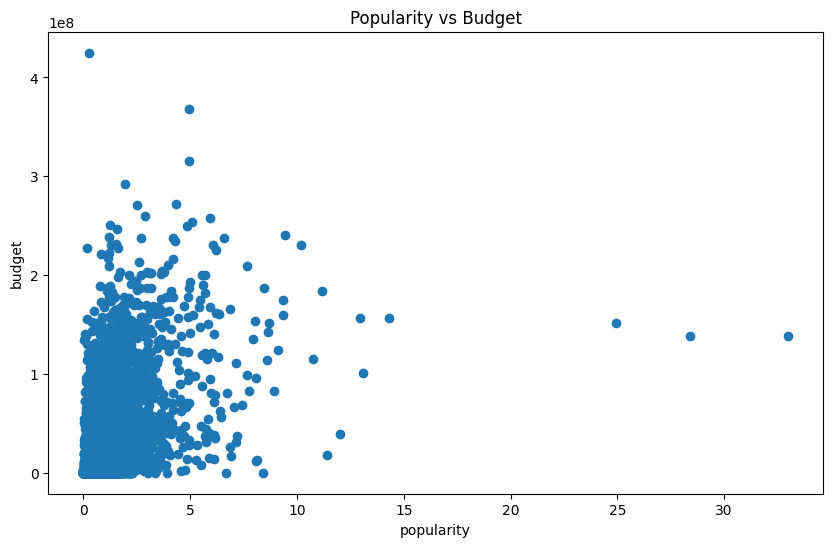

In [54]:
# now we know for sure the high popular movies get more budget let's have overall look at all movies we have 
scatter(df['popularity'], df['budget_adj'], 'popularity', 'budget', 'Popularity vs Budget')

In [55]:
# also let's pick random 1000 movies (to avoid overplotting)
df_sample=df.sample(1000)

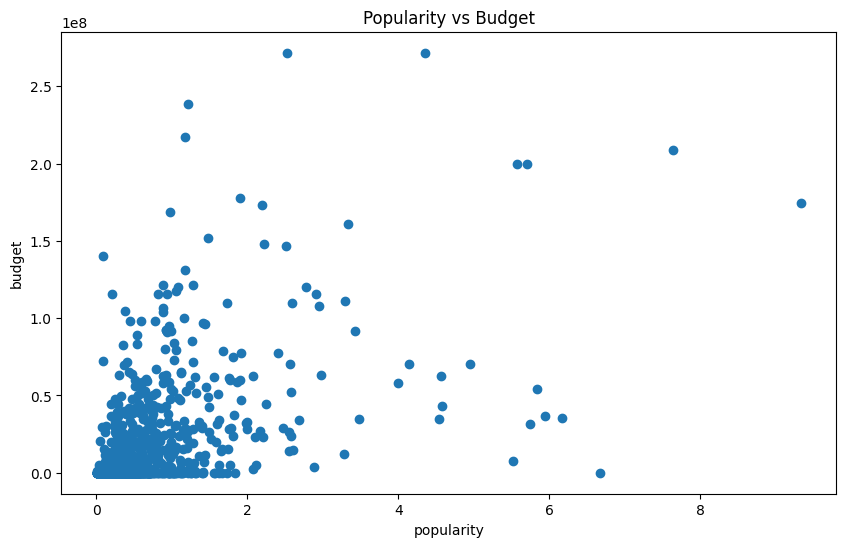

In [56]:
scatter(df_sample['popularity'], df_sample['budget_adj'], 'popularity', 'budget', 'Popularity vs Budget')

it's clear now that we have positive correlation betwen popularity and budget.

### So does a high popular movies get more budget ?
Yes! and from our analysis it seems the more popular the movie is the more likely to get bigger and bigger budget.

but does having a high popularity and big budget mean high revenue ? let's find out.

In [57]:
# let's get the mean of revenue for hpm and nhpm and compare them
hpm_rm = df_hpm['revenue_adj'].mean()
hpm_rm

151425933.80433795

In [58]:
nhpm_rm = df_nhpm['revenue_adj'].mean()
nhpm_rm

12121766.525912458

In [59]:
# the difference between the average revenue is huge and noticeable !
hpm_rm - nhpm_rm

139304167.27842548

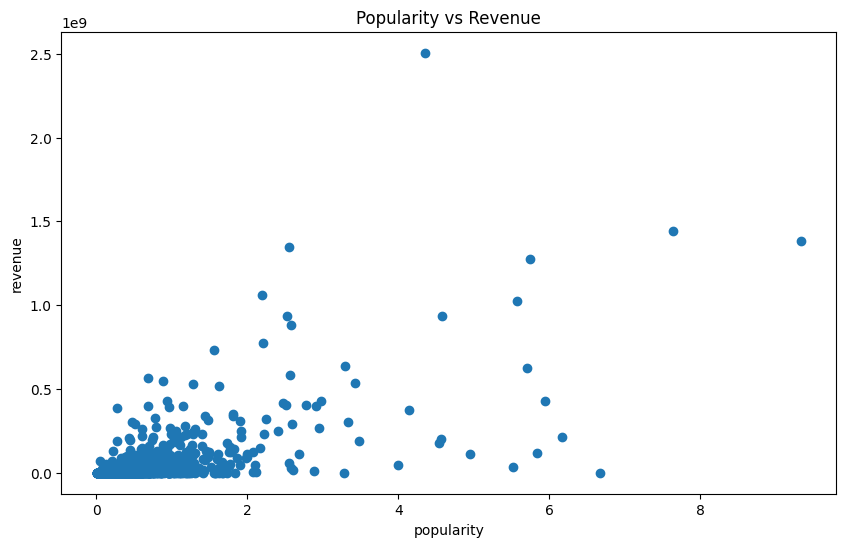

In [60]:
# using our sample data again
scatter(df_sample['popularity'], df_sample['revenue_adj'], 'popularity', 'revenue', 'Popularity vs Revenue')

So overall having a high popular movie mean getting a big budget and better revenue. 

but is budget and revenue have a relationship or it just the effect of popularity ? let's find out.

In [61]:
# first let's find the average budget spent and every budget exceed the average 
# we are going to consider it as high budget
bm = df['budget_adj'].mean()
bm

17551039.82288678

In [62]:
df_hbm = df[df['budget_adj'] > bm]
df_hbm.shape

(2975, 14)

In [63]:
df_hbm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2975.000000,2975.000000,2.975000e+03,2.975000e+03,2975.000000,2975.000000,2975.000000,2975.000000,2.975000e+03,2.975000e+03
mean,32403.989916,1.295083,4.905211e+07,1.277629e+08,112.895126,596.221176,6.109109,2000.686050,5.885626e+07,1.600170e+08
std,58245.872248,1.598004,4.269997e+07,1.945643e+08,24.092997,959.316207,0.801214,11.029287,4.362003e+07,2.364916e+08
min,11.000000,0.010335,2.500000e+06,0.000000e+00,28.000000,10.000000,2.200000,1960.000000,1.758985e+07,0.000000e+00
25%,5327.000000,0.499844,2.100000e+07,1.675143e+07,98.000000,78.000000,5.600000,1995.000000,2.808100e+07,2.306770e+07
50%,10647.000000,0.882840,3.500000e+07,6.047434e+07,109.000000,238.000000,6.100000,2003.000000,4.347073e+07,7.751848e+07
75%,25633.000000,1.510299,6.000000e+07,1.579042e+08,123.000000,669.000000,6.600000,2009.000000,7.503437e+07,1.961389e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [64]:
# not high budget movies (this set will have movies with average budget and low budget)
df_nhbm = df[df['budget_adj'] <= bm]
df_nhbm.shape

(7891, 14)

In [65]:
df_nhbm.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7891.000000,7891.000000,7.891000e+03,7.891000e+03,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03,7.891000e+03
mean,78754.464833,0.401895,1.646538e+06,6.669079e+06,97.989989,74.565834,5.924332,2001.562666,1.978484e+06,1.040103e+07
std,99102.868771,0.443366,3.651756e+06,2.382273e+07,32.809834,186.735905,0.976169,13.416832,4.200112e+06,3.994176e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,13353.500000,0.167043,0.000000e+00,0.000000e+00,89.000000,14.000000,5.300000,1994.000000,0.000000e+00,0.000000e+00
50%,27429.000000,0.296309,0.000000e+00,0.000000e+00,96.000000,25.000000,6.000000,2007.000000,0.000000e+00,0.000000e+00
75%,103956.500000,0.489852,4.250000e+05,1.926080e+05,106.000000,58.000000,6.600000,2012.000000,5.454173e+05,2.041495e+05
max,409696.000000,8.411577,1.820000e+07,4.142115e+08,900.000000,5343.000000,9.200000,2015.000000,1.752343e+07,8.530813e+08


In [66]:
# now we have our sets ready let's calculate the mean of revenue_adj and compear them
# the difference between the average revenus is huge and noticeable !
df_hbm['revenue_adj'].mean() - df_nhbm['revenue_adj'].mean()

149615981.54001185

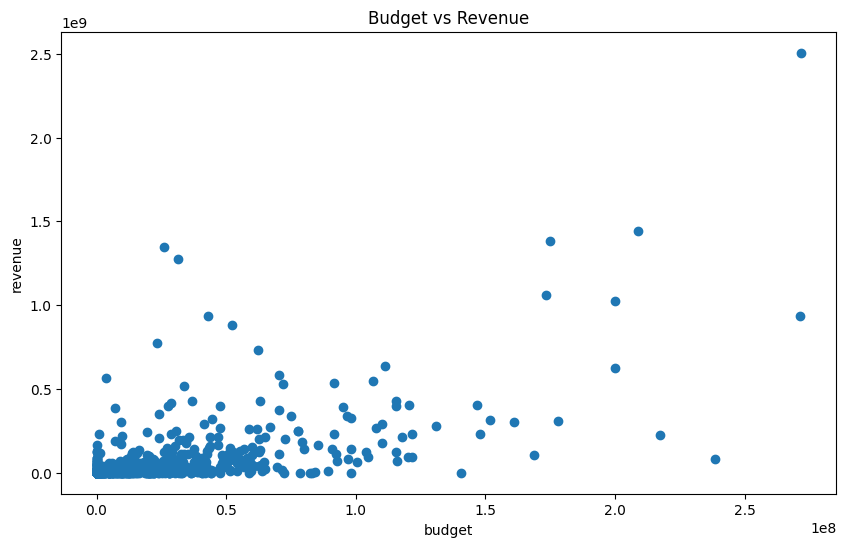

In [67]:
scatter(df_sample['budget_adj'], df_sample['revenue_adj'], 'budget', 'revenue', 'Budget vs Revenue')

So overall having a high budget movie mean better revenue. 

## Our answer for "are movies with high popularity tend to have a bigger budget and better revenue ?"

Short answer: yes they have bigger budget and better revenue also there is a positive correlation betwen budget and revenue.

long answer: Not only we were able to prove that having a high popular movies tend to have a bigger budget by comearing the average budget spent on high popular movies and the average budget spent on movies with average to low popularity and getting 36234889.892095536 as different ! we were able to prove that a high popular movies get better revenue after compering the averge revenue for high popular movies and movies with average to low popularity and geetting 139304167.27842548 as different and with that said it end up leanding to another question is there a correlation betwen budget and revenue too or it all was the effect of having high popularity ? and yes we were actually able to find that there is a positive correlation by comearing the averge revenue for high budget movies and movies with average to low budget and find 149615981.54001185 as different.

### Do movies become longer as the years go by ? (is there a correlation between relase year and runtime?)

In [68]:
#let's find out the distribution of years we have
years_array = df['release_year']
year_counts = pd.Series(years_array).value_counts()

In [69]:
years_array.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [70]:
def bar(x, y, xlabel, ylabel, title):
    '''
    this create and display bar chart 
    '''
    plt.figure(figsize=(10, 6))
    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the chart
    plt.show()

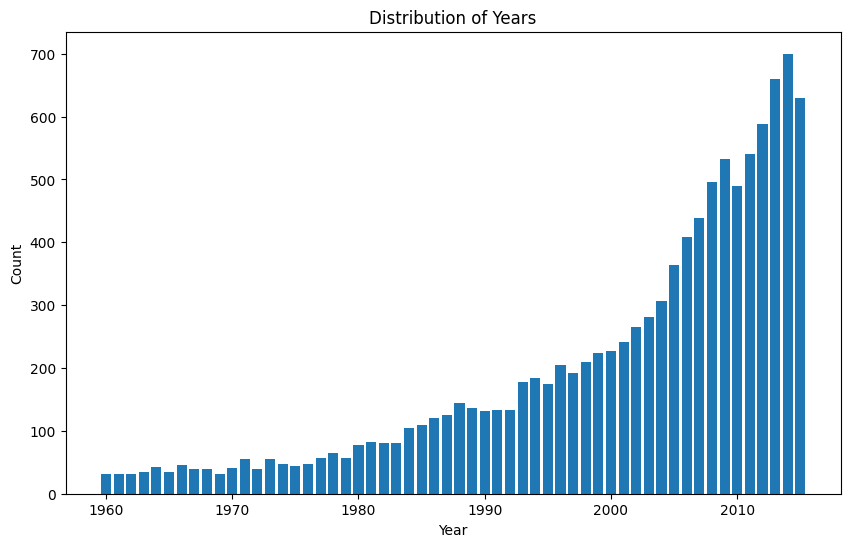

In [71]:
bar(year_counts.index, year_counts.values, 'Year', 'Count', 'Distribution of Years')

In [72]:
year_counts.values

array([700, 659, 629, 588, 540, 533, 496, 490, 438, 408, 364, 307, 281,
       266, 242, 227, 224, 210, 204, 192, 184, 178, 175, 145, 137, 133,
       133, 132, 125, 121, 109, 105,  82,  81,  80,  78,  65,  57,  57,
        55,  55,  47,  47,  46,  44,  42,  41,  40,  40,  39,  35,  34,
        32,  32,  31,  31])

it's seems that our data set full of movies that have been realse on year 2005+ mean while there are a lot of older years didn't even reach 100 movies making it unfire if we want to compear and find an answer.

what we are going to try is making a new data frame with years that have at least 100 movies and the we are randomly going choice 100 movies from every year to compear them (Note: we might end up with only years that close to each other and if that happend we need to drop the question since haveing very close data like this would not be acutly good to answer our question)

In [73]:
years = [year for year, count in year_counts.items() if count >= 100]
sorted(years)

[1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

Great :) not only we have 90s movie but also mid 80s along with 2000s and some movies that relase on 2010s 
so we have enouph data to work and play with so let's contine.

In [74]:
# so let's make our new data set then
new_dataset = pd.DataFrame()

# Iterate over each year
for year in years:
    # Filter the original dataframe for the current year
    year_records = df[df['release_year'] == year]
    
    # Randomly select 100 records from the current year
    random_records = year_records.sample(n=100, random_state=42)  # You can change the random_state value for different random samples
    
    # Append the randomly selected records to the new dataset
    new_dataset = pd.concat([new_dataset, random_records])

# Reset the index of the new dataset
new_dataset.reset_index(drop=True, inplace=True)


new_dataset.shape

(3200, 14)

In [75]:
new_dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3200.000000,3200.000000,3.200000e+03,3.200000e+03,3200.000000,3200.000000,3200.000000,3200.000000,3.200000e+03,3.200000e+03
mean,41449.475937,0.665100,1.678110e+07,4.533211e+07,103.105937,215.942187,5.979156,1999.500000,2.101408e+07,5.852085e+07
std,70888.136096,0.859360,3.165540e+07,1.192823e+08,27.417460,576.637074,0.891704,9.234536,3.629399e+07,1.414726e+08
min,6.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1984.000000,0.000000e+00,0.000000e+00
25%,9532.250000,0.238667,0.000000e+00,0.000000e+00,91.000000,18.000000,5.500000,1991.750000,0.000000e+00,0.000000e+00
50%,13926.500000,0.422714,8.750000e+05,3.932100e+05,100.000000,44.000000,6.000000,1999.500000,1.018664e+06,4.863360e+05
75%,34098.750000,0.781225,2.277450e+07,3.617784e+07,112.000000,160.250000,6.600000,2007.250000,3.038360e+07,4.963166e+07
max,417859.000000,13.112507,4.250000e+08,2.781506e+09,566.000000,9767.000000,8.900000,2015.000000,4.250000e+08,2.827124e+09


In [76]:
#let' find the mean for runtime for every year
average_runtime = new_dataset.groupby('release_year')['runtime'].mean()
average_runtime

release_year
1984    104.00
1985    114.80
1986    100.44
1987    101.12
1988    101.27
1989    103.82
1990    105.97
1991    104.73
1992    107.51
1993    111.34
1994    105.39
1995    104.61
1996    106.76
1997    106.52
1998    104.35
1999    108.36
2000    102.41
2001    102.22
2002    104.36
2003     99.86
2004    104.88
2005    103.19
2006    100.50
2007    102.13
2008    101.60
2009     99.84
2010     97.97
2011     94.57
2012     97.17
2013     97.94
2014    102.94
2015     96.82
Name: runtime, dtype: float64

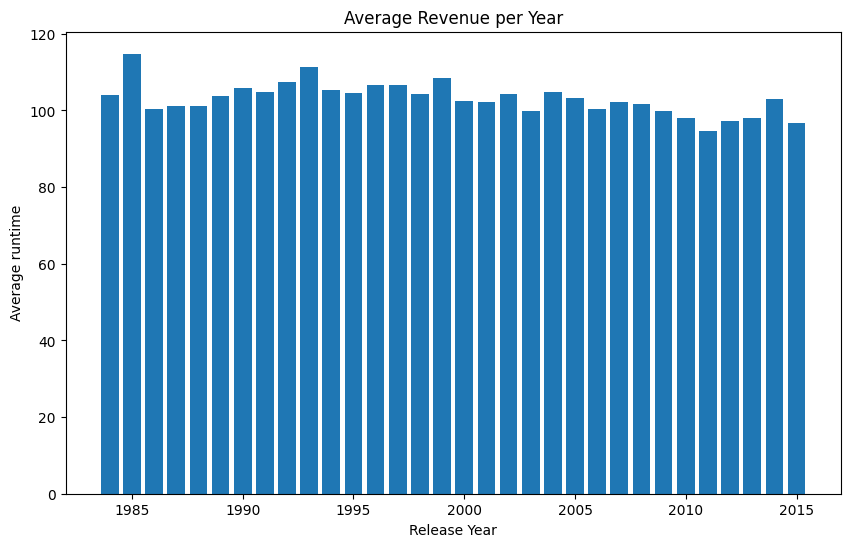

In [77]:
bar(average_runtime.index, average_runtime.values, 'Release Year', 'Average runtime', 'Average Revenue per Year')

no corrletion betwen relase year and everage runtime

## Our answer for "are movies become longer and longer with time ?"

Although we hear a lot people complins about how movies are getting longer and longer at least from 1985 to 2015 there is no corrletion we were able to find betwen the release year and average runtime in fact as the bar chart show there is no notiable differnt on the average runtime betwen the years but again this only coverd movies from 1985 to 2015.

<a id='conclusions'></a>
## Conclusions

> We start this project to answer two main questions we have. The first question is: Do high-popular movies have a bigger budget and better revenue compared to movies with average to low popularity? We were able to prove that high-popular movies have a bigger budget by comparing the average budget spent on high-popular movies and the average budget spent on movies with average to low popularity. The difference we found was 36,234,889.892095536.
Similarly, we found that high-popular movies also have better revenue. We proved this by comparing the average revenue for high-popular movies and movies with average to low popularity. The difference we found was 139,304,167.27842548.
Furthermore, we discovered a positive correlation between budget and revenue by comparing the average revenue for high budget movies and movies with average to low budget. The difference was found to be 149,615,981.54

> Moving on to the second and last question: Do movies become longer as the years go by? We noticed that the dataset we are working with is lacking in terms of recent movies since it only covers movies released up to 2015. However, we still tried our best to analyze movies from different time periods such as the mid-80s, 90s, 2000s, and some from 2010. Unfortunately, we were not able to find a correlation between release year and runtime.
It's important to note that the dataset limitations may have affected our findings regarding the second question. The dataset being outdated and not covering recent movies could have influenced the results.

In [78]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 861568 bytes to Investigate_a_Dataset.html
